In [3]:
# set path

rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = rootdir + 'Fellow-CERN/ATF2/ExpData/dfknob/'
os.chdir(workdir)
import random as rand

# from matplotlib.ticker import AutoMinorLocator

In [4]:
dat0 = loadtxt('BPM19mar15/ATF2BPM_19mar15_131004_+5kHz.asc', skiprows=1, usecols=[1, 2, 3, 4, 5])
s0, x0, sigx0, y0, sigy0 = transpose(dat0)

dat0 = loadtxt('BPM19mar15/ATF2BPM_19mar15_132500_+4kHz.asc', skiprows=1, usecols=[1, 2, 3, 4, 5])
s0, x1, sigx1, y1, sigy1 = transpose(dat0)

dat0 = loadtxt('BPM19mar15/ATF2BPM_19mar15_1311150_+2kHz.asc', skiprows=1, usecols=[1, 2, 3, 4, 5])
s0, x2, sigx2, y2, sigy2 = transpose(dat0)

dat0 = loadtxt('BPM19mar15/ATF2BPM_19mar15_134010_0kHz.asc', skiprows=1, usecols=[1, 2, 3, 4, 5])
s0, x3, sigx3, y3, sigy3 = transpose(dat0)

dat0 = loadtxt('BPM19mar15/ATF2BPM_19mar15_131617_-2kHz.asc', skiprows=1, usecols=[1, 2, 3, 4, 5])
s0, x4, sigx4, y4, sigy4 = transpose(dat0)

dat0 = loadtxt('BPM19mar15/ATF2BPM_19mar15_132011_-4kHz.asc', skiprows=1, usecols=[1, 2, 3, 4, 5])
s0, x5, sigx5, y5, sigy5 = transpose(dat0)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


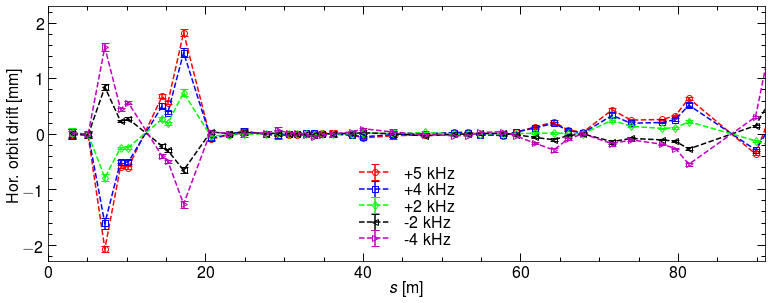

In [5]:
fig = plt.figure(figsize=(11, 4.5))
plt.errorbar(s0, (x0-x3)*1e-3, yerr=sqrt(sigx0**2+sigx3**2)*1e-3, fmt='o--', mfc='none', capsize=4, label=r'+5 kHz')
plt.errorbar(s0, (x1-x3)*1e-3, yerr=sqrt(sigx1**2+sigx3**2)*1e-3, fmt='s--', mfc='none', capsize=4, label=r'+4 kHz')
plt.errorbar(s0, (x2-x3)*1e-3, yerr=sqrt(sigx2**2+sigx3**2)*1e-3, fmt='d--', mfc='none', capsize=4, label=r'+2 kHz')
# plt.errorbar(s0, x3, yerr=sigx3, fmt='^--', mfc='none', capsize=4)
plt.errorbar(s0, (x4-x3)*1e-3, yerr=sqrt(sigx4**2+sigx3**2)*1e-3, fmt='<--', mfc='none', capsize=4, label=r'-2 kHz')
plt.errorbar(s0, (x5-x3)*1e-3, yerr=sqrt(sigx5**2+sigx3**2)*1e-3, fmt='>--', mfc='none', capsize=4, label=r'-4 kHz')
plt.xlim(0, 91)
plt.ylim(-2.3, 2.3)
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'Hor. orbit drift [mm]')
plt.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('figure/Hor_orbitdrift_march2019.eps')
fig.savefig('figure/Hor_orbitdrift_march2019.pdf')

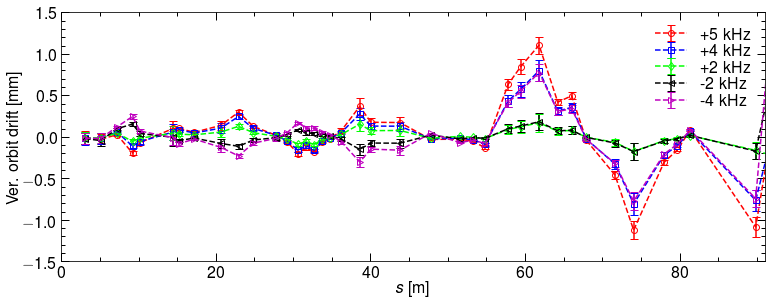

In [6]:
fig = plt.figure(figsize=(11, 4.5))
plt.errorbar(s0, (y0-y3)*1e-3, yerr=sqrt(sigy0**2+sigy3**2)*1e-3, fmt='o--', mfc='none', capsize=4, label=r'+5 kHz')
plt.errorbar(s0, (y1-y3)*1e-3, yerr=sqrt(sigy1**2+sigy3**2)*1e-3, fmt='s--', mfc='none', capsize=4, label=r'+4 kHz')
plt.errorbar(s0, (y2-y3)*1e-3, yerr=sqrt(sigy2**2+sigy3**2)*1e-3, fmt='d--', mfc='none', capsize=4, label=r'+2 kHz')
# plt.errorbar(s0, y3, yerr=sigy3, fmt='^--', mfc='none', capsize=4)
plt.errorbar(s0, (y4-y3)*1e-3, yerr=sqrt(sigy4**2+sigy3**2)*1e-3, fmt='<--', mfc='none', capsize=4, label=r'-2 kHz')
plt.errorbar(s0, (y5-y3)*1e-3, yerr=sqrt(sigy5**2+sigy3**2)*1e-3, fmt='>--', mfc='none', capsize=4, label=r'-4 kHz')
plt.xlim(0, 91)
plt.ylim(-1.5, 1.5)
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'Ver. orbit drift [mm]')
plt.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('figure/Ver_orbitdrift_march2019.eps')
fig.savefig('figure/Ver_orbitdrift_march2019.pdf')

In [7]:
# amp, beamsize, beamsize error, modulation, modulation error
dat0=loadtxt('df_fringe_190315_132652.dat', comments='!', delimiter=',', usecols=[2, 3, 4, 5, 6])
df, sigy, errsigy, modu, errmodu = transpose(dat0)

In [8]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

f_para, pcov = scipy.optimize.curve_fit(parabola, df, sigy)
df_fit = linspace(-6, 6, 50)
sigy_fit = parabola(df_fit, *f_para)

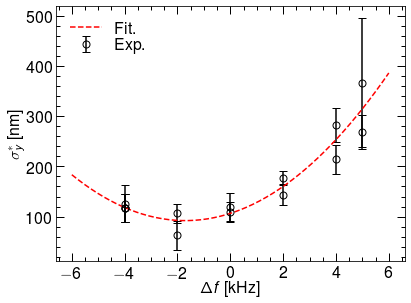

In [10]:
fig = plt.figure()
plt.errorbar(df, sigy, yerr=errsigy, fmt='ko', mfc='none', ms=7, capsize=4, label='Exp.')
plt.plot(df_fit, sigy_fit, '--', label='Fit.')
plt.xlabel(r'$\Delta{f}$ [kHz]')
plt.ylabel(r'$\sigma_y^*$ [nm]')
plt.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('figure/sigy_dfknob_march2019.eps')
fig.savefig('figure/sigy_dfknob_march2019.pdf')